# Exercise

http://bme.elektro.dtu.dk/31610/?exercises/exercise3.html

In [1]:
import numpy as np
import scipy.io
from scipy import fft
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = 15, 7

## Step 1. Load and plot signal

This signal is sampled with frequency of 500Hz.

The amplification factor on the electrode signals is 500

In [3]:
mat = scipy.io.loadmat('../data/ecg.mat')
signal = np.hstack(mat['ecg']) * 2.0 # convert to mV
print("Signal length: {}".format(len(signal)))

Signal length: 4170


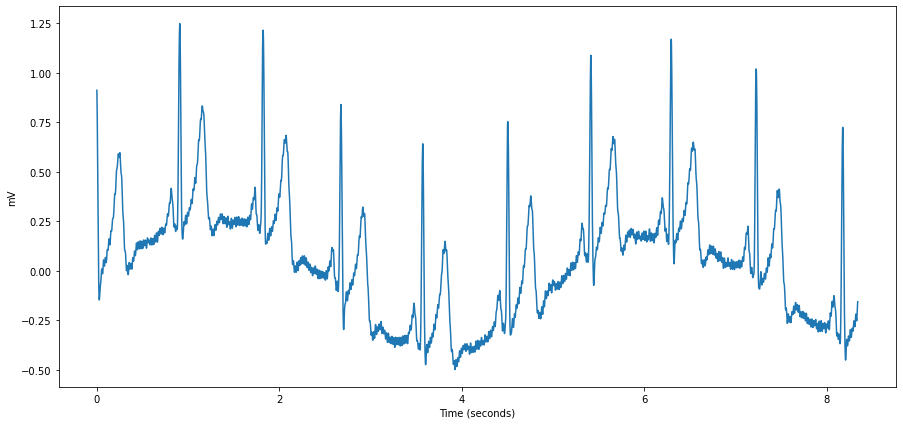

In [4]:
x = np.linspace(0.0, len(signal)/500.0, num=len(signal))
plt.plot(x, signal)
plt.xlabel("Time (seconds)")
plt.ylabel('mV')
plt.show()

### Zoom to single period

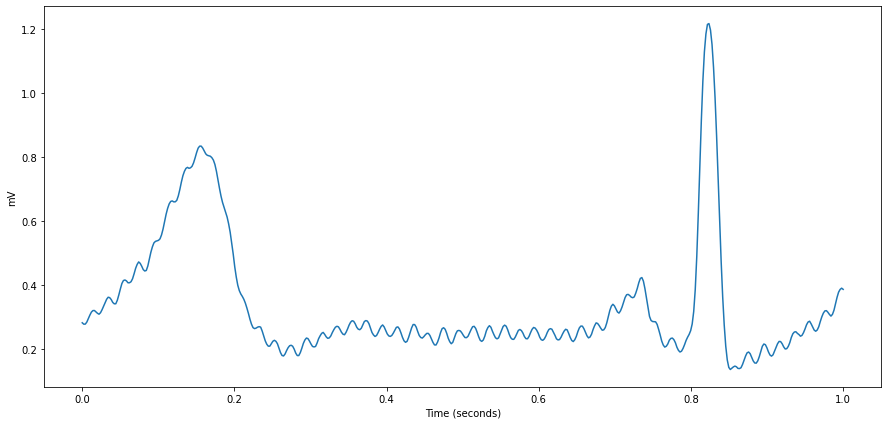

In [5]:
period = signal[500:1000]
x = np.linspace(0.0, len(period)/500.0, num=len(period))
plt.plot(x, period)
plt.xlabel("Time (seconds)")
plt.ylabel('mV')
plt.show()

## Step 1.1. Remove low (<0.5HZ) frequencies using Fourier transform

They are the result of person movement.

In [6]:
transformed = fft.fft(signal)
freq_resolution = 500.0/len(transformed)
print("Frequency resolution: {}".format(freq_resolution))
transformed

Frequency resolution: 0.11990407673860912


array([ 235.97782763  -0.j        ,  280.109905    +5.81115531j,
       -425.07027541-348.06207525j, ...,  -47.86783807 +81.1870016j ,
       -425.07027541+348.06207525j,  280.109905    -5.81115531j])

/Users/klangner/workspace/rust/biosignal.rs/examples/notebooks/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


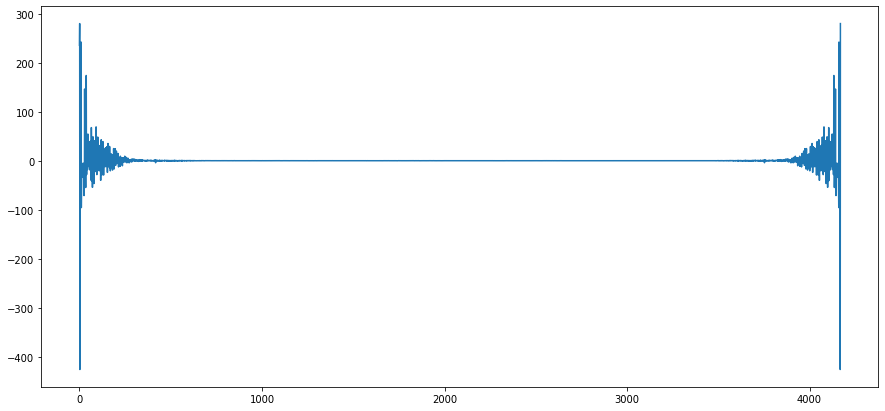

In [7]:
plt.plot(transformed)
plt.show()

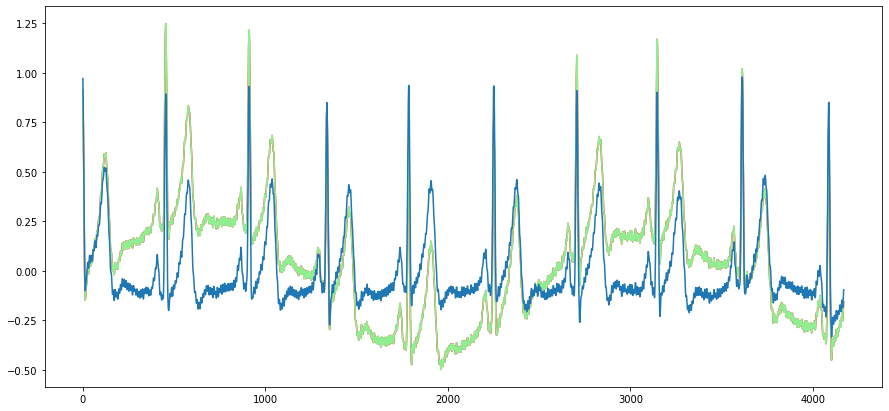

In [8]:
signal2 = [c.real for c in fft.ifft(transformed)]
transformed_filtered = np.array(transformed)
(pos, freq) = (0, 0.0)
while freq < 0.5:
    transformed_filtered[pos] = 0.j
    transformed_filtered[-1-pos] = 0.j
    freq += freq_resolution
    pos += 1
    
signal_filtered = [c.real for c in fft.ifft(transformed_filtered)]
plt.plot(signal, color='red')
plt.plot(signal2, color='lightgreen')
plt.plot(signal_filtered)
plt.show()

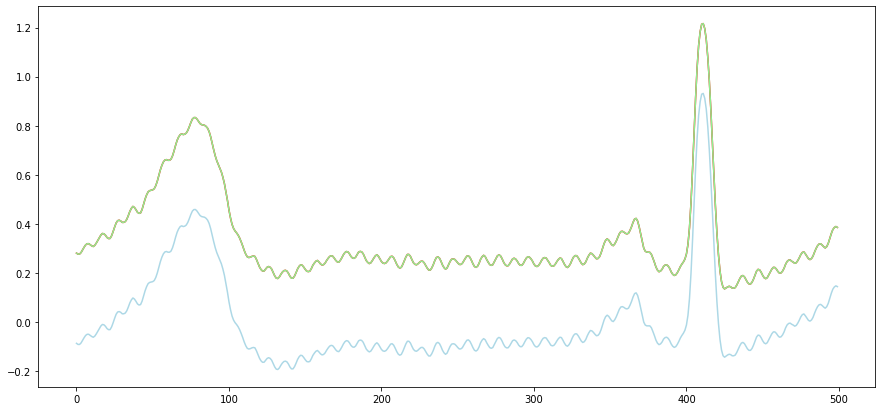

In [9]:
signal_filtered = [c.real for c in fft.ifft(transformed_filtered)]
plt.plot(signal[500:1000], color='red')
plt.plot(signal2[500:1000], color='lightgreen')
plt.plot(signal_filtered[500:1000], color='lightblue')
plt.show()

## Step 1.2. Remove <0.5Hz frequency with high pass filter